In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


In [2]:
# tạo các cột theo các phần phối khác nhau
df = pd.DataFrame({ 
    'beta': np.random.beta(5, 1, 1000) * 60,        # beta
    'exponential': np.random.exponential(10, 1000), # exponential
    'normal_p': np.random.normal(10, 2, 1000),      # normal platykurtic
    'normal_l': np.random.normal(10, 10, 1000),     # normal leptokurtic
})

In [3]:
# thêm dữ liệu được tạo theo phân phối nhị thức
first_half = np.random.normal(20, 3, 500) 
second_half = np.random.normal(-20, 3, 500) 
bimodal = np.concatenate([first_half, second_half])

df['bimodal'] = bimodal

In [4]:
# hiển thị dữ liệu
df.head()

,beta,exponential,normal_p,normal_l,bimodal
0,58.990732,3.210209,7.383094,15.010438,18.664628
1,43.245495,43.323286,3.917430,21.173717,22.175824
2,56.184663,13.444630,8.369344,11.943046,21.538297
3,53.149129,27.783016,8.734178,7.342939,24.999453
4,58.010871,1.273330,7.600568,17.048641,21.863008


Trực quan hóa dữ liệu sinh ra

<AxesSubplot:ylabel='Density'>

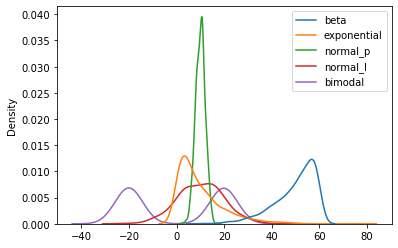

In [5]:
sns.kdeplot(data=df)

In [6]:
df.describe()

,beta,exponential,normal_p,normal_l,bimodal
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.949579,9.896871,10.020663,10.145038,-0.103209
std,8.658877,9.619539,2.032465,9.706989,20.153828
min,10.684990,0.021893,2.555772,-23.778950,-28.681833
25%,45.034234,2.966209,8.593728,3.533208,-19.991816
50%,52.358983,6.842271,10.091111,10.437200,0.062626
75%,56.813381,13.728411,11.338220,16.734231,19.862512
max,59.982800,76.774097,17.093069,43.103694,28.403804


Thêm một đặc trưng với giá trị lớn hơn nhiều

<AxesSubplot:ylabel='Density'>

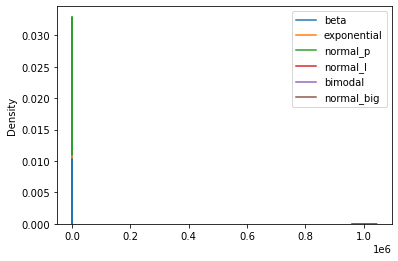

In [7]:
normal_big = np.random.normal(1000000, 10000, (1000,1))  # normal distribution of large values
df['normal_big'] = normal_big
sns.kdeplot(data=df)

<AxesSubplot:>

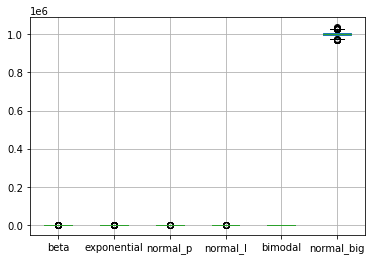

In [8]:
# trực quan hóa bằng biểu đồ box plot
df.boxplot()

# Chuẩn hóa với Min-Max scaling

In [9]:
# Khai báo đối tượng MinMaxScaler
scaler = MinMaxScaler()

In [10]:
# Chuẩn hóa dữ liệu trong df với StandardScaler
df_s = scaler.fit_transform(df)


In [11]:
# lấy danh sáchc cột
col_names = list(df.columns)


In [12]:
# chuyển về DataFrame, gán các cột của df cho dữ liệu đã được chuẩn hóa
df_s = pd.DataFrame(df_s, columns=col_names)

In [13]:
df_s.head()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
0,0.979876,0.041540,0.332065,0.579962,0.829394,0.512832
1,0.660486,0.564171,0.093667,0.672113,0.890901,0.638271
2,0.922955,0.174884,0.399907,0.534100,0.879733,0.347882
3,0.861380,0.361698,0.425004,0.465321,0.940364,0.661183
4,0.960000,0.016305,0.347024,0.610436,0.885421,0.441520


<AxesSubplot:ylabel='Density'>

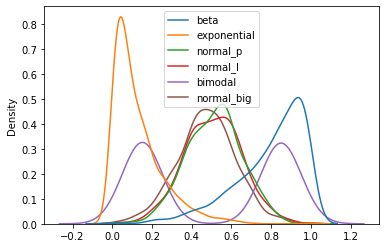

In [14]:
# biểu diễn dữ liệu đã được chuẩn hóa
sns.kdeplot(data=df_s)

<AxesSubplot:>

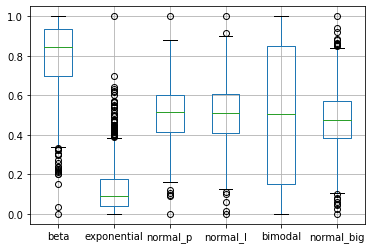

In [15]:
# trực quan hóa bằng biểu đồ box plot
df_s.boxplot()

In [16]:
# thống kê về dữ liệu được sinh ra
df_s.describe()

,beta,exponential,normal_p,normal_l,bimodal,normal_big
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.796477,0.128661,0.513499,0.507217,0.500627,0.474665
std,0.175644,0.125332,0.139810,0.145135,0.353046,0.148324
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.696770,0.038361,0.415342,0.408359,0.152228,0.384643
50%,0.845352,0.088862,0.518345,0.511585,0.503532,0.475007
75%,0.935709,0.178581,0.604132,0.605735,0.850378,0.569609
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# lấy giá trị min của cột beta
df_s['beta'].min()

0.0

In [18]:
# lấy giá trị max của cột beta
df_s['beta'].max()

1.0

In [19]:
# in các giá trị min của từng cột trong dữ liệu chưa chuẩn hóa
mins = [df[col].min() for col in df.columns]
mins

[10.684990207350712,
 0.021893289964207627,
 2.5557722672653735,
 -23.778950104899018,
 -28.681833170346337,
 967318.6998310533]

In [20]:
# in các giá trị min của từng cột trong dữ liệu đã chuẩn hóa
mins = [df_s[col].min() for col in df_s.columns]
mins

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

In [21]:
# in các giá trị max của từng cột dữ liệu chưa chuẩn hóa
maxs = [df[col].max() for col in df.columns]
maxs

[59.98280044091951,
 76.77409661007327,
 17.093069493207317,
 43.10369404141541,
 28.40380446230936,
 1036242.6757967039]

In [22]:
# in các giá trị max của từng cột dữ liệu đã chuẩn hóa
maxs = [df_s[col].max() for col in df_s.columns]
maxs

[1.0, 1.0, 1.0, 1.0, 0.9999999999999999, 1.0]